In [55]:
### Follow https://nthu-datalab.github.io/ml/labs/13_Sentiment_Analysis_and_Neural_Machine_Translation/13_Sentiment_Analysis_and_Neural_Machine_Translation.html
# It contains two topic about RNN (two examples)
# 1. Sentiment Analysis
# 2. Neural Machine Translation

In [56]:
import numpy as np
import tensorflow as tf
import os

In [57]:
def read_file(directory):
    data = []
    for f in os.listdir(directory):
        content = open(directory + f, 'r', encoding='utf8').read()
        data.append((content, int(f[-5])))
    return data

train_data = read_file('../../dataset/aclImdb/train/neg/') + read_file('../../dataset/aclImdb/train/pos/')
test_data = read_file('../../dataset/aclImdb/test/neg/') + read_file('../../dataset/aclImdb/test/pos/')

In [58]:
import spacy

# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_lg')

w_apple = nlp('apple')
w_banana = nlp('banana')
w_mac = nlp('mac')

print("%s vs %s: %.6f" % (w_apple, w_banana, w_apple.similarity(w_banana)))
print("%s vs %s: %.6f" % (w_apple, w_mac, w_apple.similarity(w_mac)))
print("%s vs %s: %.6f" % (w_banana, w_mac, w_banana.similarity(w_mac)))
# Do not know why

apple vs banana: 0.583184
apple vs mac: 0.574916
banana vs mac: 0.243292


In [59]:
def remove_unknown_words(data):
    new_data = []
    for content, label in data:
        s = ' '.join([w for w in content.split(' ') if w in nlp.vocab])
        new_data.append((s, label))
    return new_data

train_dat = remove_unknown_words(train_data)
test_dat = remove_unknown_words(test_data)

In [60]:
# 避免 padding 太多導致學不到東西，先將 data 分類
class BatchGenerator:
    def __init__(self, dat, batch_size):
        n = len(dat)
        n_batch = n // batch_size + 1
        self.batch_xs, self.batch_ys, self.reviews = [], [], []
        padding_vec = nlp(' ').vector

        dat = sorted(map(lambda pair: (nlp(pair[0]), pair[1]), dat), key=lambda x: len(x[0]))
        for i in range(n_batch):
            print("第 {}/{} 個 batch".format(i+1, n_batch))
            
            batch_dat = dat[i*batch_size : (i+1)*batch_size]
            if not batch_dat: continue
            
            longest = len(batch_dat[-1][0])            
            batch_x = np.zeros((batch_size, longest, 300))
            batch_y = np.zeros((batch_size, 10))    # label for 0 - 9
            review  = []
            
            for j, each in enumerate(batch_dat):
                for k, w in enumerate(each[0]):
                    batch_x[j][k] = w.vector        # use existing Word2vec model
                for k in range(k, longest):
                    batch_x[j][k] = padding_vec     # padding with ' '

                batch_y[j][each[1]] = 1             # represent class as one-hot encoding
                review.append(each[0])
            
            self.batch_xs.append(batch_x)
            self.batch_ys.append(batch_y)
            self.reviews.append(review)
        
    def get(self, batch_id):
        # print(len(self.batch_xs))
        return self.batch_xs[batch_id], self.batch_ys[batch_id], self.reviews[batch_id]

In [61]:
batch = BatchGenerator(train_dat, 32)

xs, ys, rv = batch.get(0)
print(xs[0])
print(ys[0])
print(rv[0])

第 1/782 個 batch
第 2/782 個 batch
第 3/782 個 batch
第 4/782 個 batch
第 5/782 個 batch
第 6/782 個 batch
第 7/782 個 batch
第 8/782 個 batch
第 9/782 個 batch
第 10/782 個 batch
第 11/782 個 batch
第 12/782 個 batch
第 13/782 個 batch
第 14/782 個 batch
第 15/782 個 batch
第 16/782 個 batch
第 17/782 個 batch
第 18/782 個 batch
第 19/782 個 batch
第 20/782 個 batch
第 21/782 個 batch
第 22/782 個 batch
第 23/782 個 batch
第 24/782 個 batch
第 25/782 個 batch
第 26/782 個 batch
第 27/782 個 batch
第 28/782 個 batch
第 29/782 個 batch
第 30/782 個 batch
第 31/782 個 batch
第 32/782 個 batch
第 33/782 個 batch
第 34/782 個 batch
第 35/782 個 batch
第 36/782 個 batch
第 37/782 個 batch
第 38/782 個 batch
第 39/782 個 batch
第 40/782 個 batch
第 41/782 個 batch
第 42/782 個 batch
第 43/782 個 batch
第 44/782 個 batch
第 45/782 個 batch
第 46/782 個 batch
第 47/782 個 batch
第 48/782 個 batch
第 49/782 個 batch
第 50/782 個 batch
第 51/782 個 batch
第 52/782 個 batch
第 53/782 個 batch
第 54/782 個 batch
第 55/782 個 batch
第 56/782 個 batch
第 57/782 個 batch
第 58/782 個 batch
第 59/782 個 batch
第 60/7

第 469/782 個 batch
第 470/782 個 batch
第 471/782 個 batch
第 472/782 個 batch
第 473/782 個 batch
第 474/782 個 batch
第 475/782 個 batch
第 476/782 個 batch
第 477/782 個 batch
第 478/782 個 batch
第 479/782 個 batch
第 480/782 個 batch
第 481/782 個 batch
第 482/782 個 batch
第 483/782 個 batch
第 484/782 個 batch
第 485/782 個 batch
第 486/782 個 batch
第 487/782 個 batch
第 488/782 個 batch
第 489/782 個 batch
第 490/782 個 batch
第 491/782 個 batch
第 492/782 個 batch
第 493/782 個 batch
第 494/782 個 batch
第 495/782 個 batch
第 496/782 個 batch
第 497/782 個 batch
第 498/782 個 batch
第 499/782 個 batch
第 500/782 個 batch
第 501/782 個 batch
第 502/782 個 batch
第 503/782 個 batch
第 504/782 個 batch
第 505/782 個 batch
第 506/782 個 batch
第 507/782 個 batch
第 508/782 個 batch
第 509/782 個 batch
第 510/782 個 batch
第 511/782 個 batch
第 512/782 個 batch
第 513/782 個 batch
第 514/782 個 batch
第 515/782 個 batch
第 516/782 個 batch
第 517/782 個 batch
第 518/782 個 batch
第 519/782 個 batch
第 520/782 個 batch
第 521/782 個 batch
第 522/782 個 batch
第 523/782 個 batch
第 524/782 

In [62]:
class SentimentReviewRNN:

    def __init__(self):
        with tf.variable_scope('rnn_i/o'):
            # use None for batch size and dynamic sequence length
            self.inputs = tf.placeholder(tf.float32, shape=[None, None, 300])
            self.groundtruths = tf.placeholder(tf.float32, shape=[None, 10])

        with tf.variable_scope('rnn_cell'):
            self.cell = tf.contrib.rnn.LSTMCell(128)
            # project RNN output into target class dimension
            self.out_cell = tf.contrib.rnn.OutputProjectionWrapper(self.cell, 10)

        with tf.variable_scope('rnn_forward'):
            # use dynamic_rnn for different length
            self.outputs, _ = tf.nn.dynamic_rnn(self.out_cell, self.inputs, dtype=tf.float32)
            self.outputs = self.outputs[:, -1, :]  # only use the last output of sequence

        with tf.variable_scope('rnn_loss'):
            # use cross_entropy as class loss
            self.loss = tf.losses.softmax_cross_entropy(onehot_labels=self.groundtruths, logits=self.outputs)
            self.optimizer = tf.train.AdamOptimizer(0.02).minimize(self.loss)

        with tf.variable_scope('rnn_accuracy'):
            self.accuracy = tf.contrib.metrics.accuracy(labels=tf.argmax(self.groundtruths, axis=1), 
                                                        predictions=tf.argmax(self.outputs, axis=1))

        self.sess = tf.Session()
        self.sess.run(tf.global_variables_initializer())  # don't forget to initial all variables
        self.saver = tf.train.Saver()  # a saver is for saving or restoring your trained weight

    def train(self, batch_x, batch_y):
        fd = {}
        fd[self.inputs] = batch_x
        fd[self.groundtruths] = batch_y
        # feed in input and groundtruth to get loss and update the weight via Adam optimizer
        loss, accuracy, _ = self.sess.run([self.loss, self.accuracy, self.optimizer], fd)

        return loss, accuracy

    def test(self, batch_x, batch_y):
        fd = {}
        fd[self.inputs] = batch_x
        fd[self.groundtruths] = batch_y
        prediction, accuracy = self.sess.run([self.outputs, self.accuracy], fd)

        return prediction, accuracy

    def save(self, e):
        self.saver.save(self.sess, 'model/rnn/rnn_%d.ckpt' % (e + 1))

    def restore(self, e):
        self.saver.restore(self.sess, 'model/rnn/rnn_%d.ckpt' % (e))

In [66]:
# hyperparameter of our network
EPOCHS = 30
BATCH_SIZE = 128
train_batch = BatchGenerator(train_dat, BATCH_SIZE)
test_batch = BatchGenerator(test_dat, BATCH_SIZE)

n_train = len(train_dat) // BATCH_SIZE
n_test = len(test_dat) // BATCH_SIZE
tf.reset_default_graph()
model = SentimentReviewRNN()

第 1/196 個 batch
第 2/196 個 batch
第 3/196 個 batch
第 4/196 個 batch
第 5/196 個 batch
第 6/196 個 batch
第 7/196 個 batch
第 8/196 個 batch
第 9/196 個 batch
第 10/196 個 batch
第 11/196 個 batch
第 12/196 個 batch
第 13/196 個 batch
第 14/196 個 batch
第 15/196 個 batch
第 16/196 個 batch
第 17/196 個 batch
第 18/196 個 batch
第 19/196 個 batch
第 20/196 個 batch
第 21/196 個 batch
第 22/196 個 batch
第 23/196 個 batch
第 24/196 個 batch
第 25/196 個 batch
第 26/196 個 batch
第 27/196 個 batch
第 28/196 個 batch
第 29/196 個 batch
第 30/196 個 batch
第 31/196 個 batch
第 32/196 個 batch
第 33/196 個 batch
第 34/196 個 batch
第 35/196 個 batch
第 36/196 個 batch
第 37/196 個 batch
第 38/196 個 batch
第 39/196 個 batch
第 40/196 個 batch
第 41/196 個 batch
第 42/196 個 batch
第 43/196 個 batch
第 44/196 個 batch
第 45/196 個 batch
第 46/196 個 batch
第 47/196 個 batch
第 48/196 個 batch
第 49/196 個 batch
第 50/196 個 batch
第 51/196 個 batch
第 52/196 個 batch
第 53/196 個 batch
第 54/196 個 batch
第 55/196 個 batch
第 56/196 個 batch
第 57/196 個 batch
第 58/196 個 batch
第 59/196 個 batch
第 60/1

In [67]:
rec_loss = []

for e in range(EPOCHS):  # train for several epochs
    loss_train = 0
    accuracy_train = 0

    for b in range(n_train):  # feed batches one by one
        batch_x, batch_y, _ = train_batch.get(b)
        loss_batch, accuracy_batch = model.train(batch_x, batch_y)

        loss_train += loss_batch
        accuracy_train += accuracy_batch

    loss_train /= n_train
    accuracy_train /= n_train

#     model.save(e)  # save your model after each epoch
    rec_loss.append([loss_train, accuracy_train])

# np.save('./model/rnn/rec_loss.npy', rec_loss)

1.8513173195031973


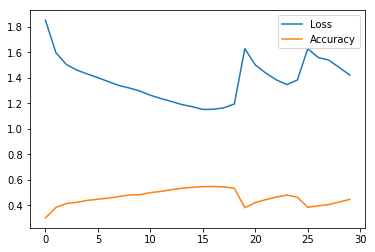

In [68]:
# rec_loss = np.load('./model/rnn/rec_loss.npy')

import matplotlib.pyplot as plt

print(rec_loss[0][0])
plt_loss = plt.plot([rec_loss[i][0] for i in range(len(rec_loss))])
plt_accuracy = plt.plot([rec_loss[i][1] for i in range(len(rec_loss))])
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [69]:
accuracy_test = 0

for b in range(n_test):
    batch_x, batch_y, _ = test_batch.get(b)
    _, accuracy_batch = model.test(batch_x, batch_y)

    accuracy_test += accuracy_batch

accuracy_test /= n_test

print('Test: %.4f' % (accuracy_test))

Test: 0.3738


In [70]:
%reset -sf